In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive
!unzip NIH_CXR14_Resized.zip -d /content/
%cd /content/gdrive/MyDrive/Colab\ Notebooks

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: /content/NIH small/00028897_015.png  
  inflating: /content/NIH small/00028897_016.png  
  inflating: /content/NIH small/00028897_017.png  
  inflating: /content/NIH small/00028897_018.png  
  inflating: /content/NIH small/00028897_019.png  
  inflating: /content/NIH small/00028897_020.png  
  inflating: /content/NIH small/00028898_000.png  
  inflating: /content/NIH small/00028899_000.png  
  inflating: /content/NIH small/00028899_001.png  
  inflating: /content/NIH small/00028899_002.png  
  inflating: /content/NIH small/00028900_000.png  
  inflating: /content/NIH small/00028901_000.png  
  inflating: /content/NIH small/00028901_001.png  
  inflating: /content/NIH small/00028902_000.png  
  inflating: /content/NIH small/00028902_001.png  
  inflating: /content/NIH small/00028902_002.png  
  inflating: /content/NIH small/00028902_003.png  
  inflating: /content/NIH small/00028902_004.png  
  inflating: /c

In [3]:
pip install torchray

     |████████████████████████████████| 378kB 10.5MB/s 
  Created wheel for torchray: filename=torchray-1.0.0.2-cp36-none-any.whl size=444027 sha256=37b53941da8be844e70f013ce46a1c7c6891b9b21a2642cde1e0b6111cc3ab92
  Stored in directory: /root/.cache/pip/wheels/49/21/6d/e6794f79658b66a0775b164fdd274b81a4c96e4eab5baaacb0
Successfully built torchray


In [4]:
import visualize_prediction as V
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


PATH_TO_IMAGES = "/content/NIH small"
PATH_TO_MODEL = "/content/checkpoint_best"
POSITIVE_FINDINGS_ONLY=True
LABEL='Pneumonia'

dataloader, model= V.load_data(PATH_TO_IMAGES, LABEL, PATH_TO_MODEL, 'BBox', POSITIVE_FINDINGS_ONLY)
print("Cases for review:")
print(len(dataloader))

Cases for review:
120


range:
0.1639557
percerntile:
-0.17203404188156127
avg:
-0.12933233
(slice(0, 224, None), slice(0, 224, None))
ior:
0.03653140943877551
iobb:
0.03653140943877551


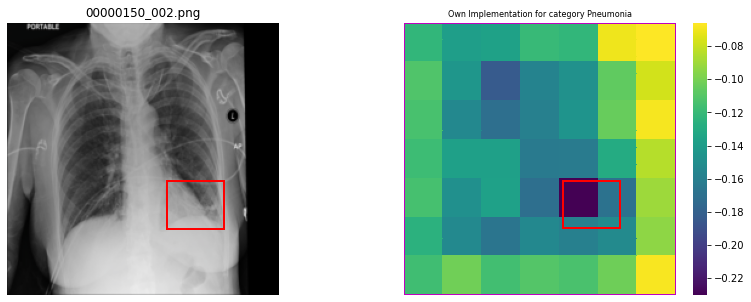

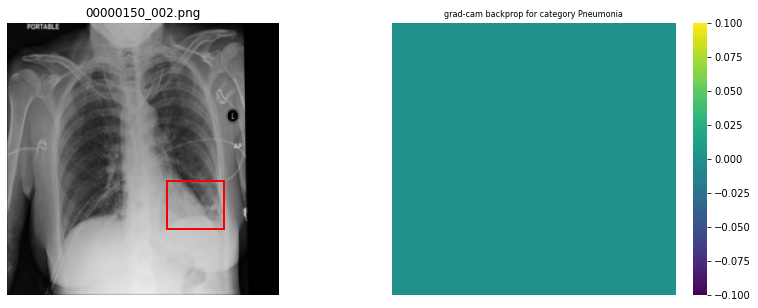

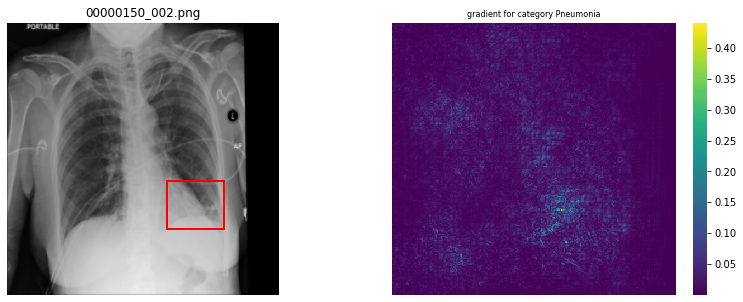

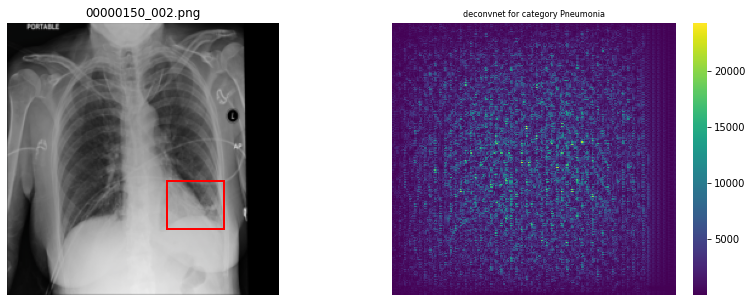

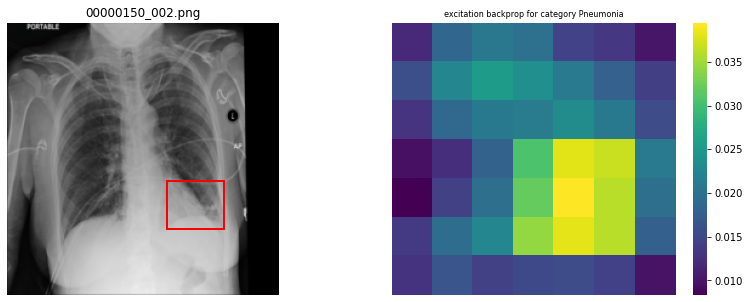

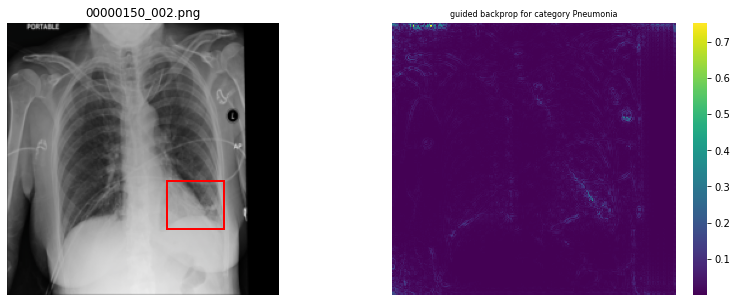

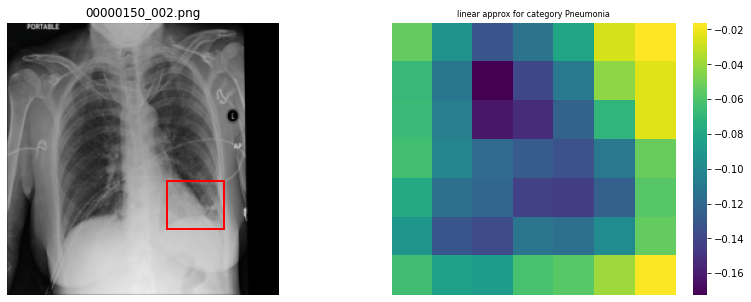

                   Predicted Probability  Ground Truth
Finding                                               
Atelectasis                        0.415          True
Infiltration                       0.101          True
Pneumothorax                       0.081         False
Effusion                           0.064         False
Nodule                             0.042         False
Mass                               0.039         False
Pleural_Thickening                 0.036         False
Consolidation                      0.022         False
Emphysema                          0.019         False
Fibrosis                           0.014         False
Pneumonia                          0.010          True
Edema                              0.005         False
Hernia                             0.002         False
Cardiomegaly                       0.001         False


In [5]:
V.plot_map(model, dataloader, LABEL, saliency_layer='features.norm5')